<a href="https://colab.research.google.com/github/KazumaShachou/Machine_And_DeepLeaning/blob/master/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow
from keras.datasets import mnist  #base de dados Mnist
from tensorflow.python.keras import Sequential  #Modelo de rede neural
from tensorflow.python.keras.layers import Dense, Dropout   #Neuronios(base de rede) e regularizador(evita overfit)
from tensorflow.compat.v1.keras.optimizers import RMSprop  #Otimizador (back propagation)

In [2]:
#carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
print('Quantidade de imagens para treino :', len(x_treino))
print('Quantidade de imagens para teste :', len(x_teste))

Quantidade de imagens para treino : 60000
Quantidade de imagens para teste : 10000


In [4]:
primeira_imagem = x_treino[0]
print(primeira_imagem)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print('o formato da primeira imagem', primeira_imagem.shape, type(primeira_imagem.shape))

o formato da primeira imagem (28, 28) <class 'tuple'>


Essa imagem representa 6


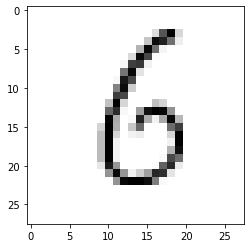

In [6]:
import matplotlib.pyplot as plt

indice = 18
print('Essa imagem representa', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [7]:
#achatando a matriz de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape  #28,28
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]  #28*28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total	)    #x_treino foi achatado aqui, pelo reshape(mudando formato)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total	)    #so executar 1 vez ou pode dar erro, se for usar novamente, executar de novo do 0


In [8]:
#255 vira 1
#127 vira 0.5
#0 é 0

#imagem fornece 255 de valor maximo, vamos normaliza-lo

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /=  255
print(x_treino[0][350], type(x_treino[0][350]))    #não executar de novo, ou dara erro  

0.27450982 <class 'numpy.float32'>


In [9]:
#vizualizar os dados normalizados
print('Dados normalizados', x_treino[0])

Dados normalizados [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [10]:

#preparação para camada de saida output
valores_unicos = set(y_treino)
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos)
#transformar valores unicos em variáveis categoricas
# numero 0 -> [1,0,0,0,0,0,0,0,0,0]
#numero 1 => [0,1,0,0,0,0,0,0,0,0]   etc

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [11]:
#criando modelo da rede neural
model = Sequential()

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))
#adicionar o regularizador pra evitar o overfit, será o dropout

model.add(Dropout(0.2))

#segunda hidden layer
model.add(Dense(20, activation='relu'))

#mais 1 regularizador
model.add(Dropout(0.2))

#adicionando a cammada de saida output, informando a quantidade de valores unicos
model.add(Dense(quantidade_valores_unicos, activation = 'softmax'))

#resumo do modelo criado
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compilar o modelo
model

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(model.history).plot(figsize = (12,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

TypeError: ignored

In [ ]:
#compila modelo
model.compile(loss = 'categorical_cro ')